My methodology for this is as follows:

I created functions which would return the coefficients and variation of the fixed effects, the variation and standard error of the random effects, and the ICC. I then defined the models individually and used these functions to extract this information from the summary function. However, I was unable to create this into a nice table using R, so I simply pasted the results into Excel (included in Word Document).
I then created the Standard BMI variable by subtracting the baseline from the BMI and using this as my dependent variable for the fourth and fifth models.  I then created the same models on the modified dataset, removing the first values of each. The final result of modelinfo (the function I created) contains all of the data in the tables above. It finds the results for all tables.

I found the predictions for the Y1j for each j and compared them to the baseline BMI. They were not identical, which aligns with my views on the issues with using the zj variable in this way. This was not rectified by model 4 or 5 either, as it did not predict 0 for all of the Y1j.

To compare the first five models with the final five, I calculated the sum squared error of each in relation to one another. Every corresponding model with the smaller dataset performed better than the model including the baseline, which was expected.

Finally, I created residual plots for each of the models I created.


This is based on a dummy set of BMI data from various individuals over time.

In [1]:
library(lme4)

count<-c(1:20)
ID<-c(rep(1,4),rep(2,4),rep(3,4),rep(4,4),rep(5,4))
time<-c(rep(c(0,1,2,4),5))
baseline<-c(rep(20,4),rep(25,4),rep(26,4),rep(21,4),rep(23,4))
BMI<-c(20,21,22,24,25,28,27,28,26,24,25,28,21,26,24,25,23,28,27,28)

data.bmi<-data.frame(ID,time,baseline,BMI)

Loading required package: Matrix


First, let's create functions which would return the coefficients and variation of the fixed effects, the variation and standard error of the random effects, and the ICC

In [4]:
findcoefficients<-function(model){
  ncoef<-nrow(as.data.frame(summary(model)$coefficients)[1])
  summary(model)$coefficients[1:ncoef,1:2]
}

findrandomcomp<-function(model){
  nran<-nrow(as.data.frame(VarCorr(mod1)))
  m<-as.data.frame(VarCorr(model));m[1,1]<-m[1,2]
  m[1:nran,c(1,4:5)]
}

We then fit various HLM models, using the raw BMI and a standard BMI (by subtracting the first data point).

[1]  0  1  2  4  0  3  2  3  0 -2 -1  2  0  5  3  4  0  5  4  5

Linear mixed model fit by REML ['lmerMod']
Formula: StandardBMI ~ time + (1 | ID)
   Data: data.bmi

REML criterion at convergence: 76.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.25749 -0.47109 -0.08179  0.35123  1.99294 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 1.592    1.262   
 Residual             2.006    1.416   
Number of obs: 20, groups:  ID, 5

Fixed effects:
            Estimate Std. Error t value
(Intercept)   0.6400     0.7478   0.856
time          0.7771     0.2141   3.630

Correlation of Fixed Effects:
     (Intr)
time -0.501

Linear mixed model fit by REML ['lmerMod']
Formula: StandardBMI ~ time - 1 + (1 | ID)
   Data: data.bmi

REML criterion at convergence: 78.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.08881 -0.46448 -0.04955  0.31983  2.13806 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 1.505    1.227   
 Residual             1.997    1.413   
Number of obs: 20, groups:  ID, 5

Fixed effects:
     Estimate Std. Error t value
time   0.8717     0.1839   4.739

,Estimate,Std. Error
(Intercept),7.7169231,6.3749524
time,0.7771429,0.2141033
baseline,0.6923077,0.2753427
grp,vcov,sdcor
(Intercept),1.469776,1.212343
Residual,2.005510,1.416160


,Estimate,Std. Error
time,0.7907957,0.21377903
baseline,1.0235314,0.03291173
grp,vcov,sdcor
(Intercept),1.698775,1.303371
Residual,2.005649,1.416209


,Estimate,Std. Error
(Intercept),23.6400000,1.0291432
time,0.7771429,0.2141033
grp,vcov,sdcor
(Intercept),4.092372,2.022961
Residual,2.005510,1.416160


[1]  1  2  4  3  2  3 -2 -1  2  5  3  4  5  4  5

Linear mixed model fit by REML ['lmerMod']
Formula: StandardBMI2 ~ time2 + (1 | ID2)
   Data: data.bmi2

REML criterion at convergence: 54.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2311 -0.5664 -0.2443  0.7900  1.5429 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID2      (Intercept) 3.286    1.813   
 Residual             1.310    1.145   
Number of obs: 15, groups:  ID2, 5

Fixed effects:
            Estimate Std. Error t value
(Intercept)   1.6000     1.0248   1.561
time2         0.4571     0.2369   1.929

Correlation of Fixed Effects:
      (Intr)
time2 -0.540

Linear mixed model fit by REML ['lmerMod']
Formula: StandardBMI2 ~ time2 - 1 + (1 | ID2)
   Data: data.bmi2

REML criterion at convergence: 59

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8610 -0.4935 -0.2930  0.7767  1.7955 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID2      (Intercept) 4.19     2.047   
 Residual             1.35     1.162   
Number of obs: 15, groups:  ID2, 5

Fixed effects:
      Estimate Std. Error t value
time2   0.6310     0.2079   3.036

,Estimate,Std. Error
(Intercept),7.7169231,6.3749524
time,0.7771429,0.2141033
baseline,0.6923077,0.2753427
grp,vcov,sdcor
(Intercept),1.469776,1.212343
Residual,2.005510,1.416160
,Estimate,Std. Error
time,0.7907957,0.21377903
baseline,1.0235314,0.03291173
grp,vcov,sdcor


ID,time,baseline,BMI
1,0,20,20
1,1,20,21
1,2,20,22
1,4,20,24
2,0,25,25
2,1,25,28
2,2,25,27
2,4,25,28
3,0,26,26
3,1,26,24


1        5        9       13       17 
20.68838 25.48347 24.72751 22.54217 24.75846

[1] 20 25 26 21 23

1        5        9       13       17 
20.74472 25.42171 24.30814 22.74914 24.97628

[1] 20 25 26 21 23

[1] 29.60749

[1] 12.28023

[1] 29.91219

[1] 12.35468

[1] 28.9527

[1] 12.25854

[1] 10698.67

[1] 8017.897

[1] 10807.63

[1] 8099.864

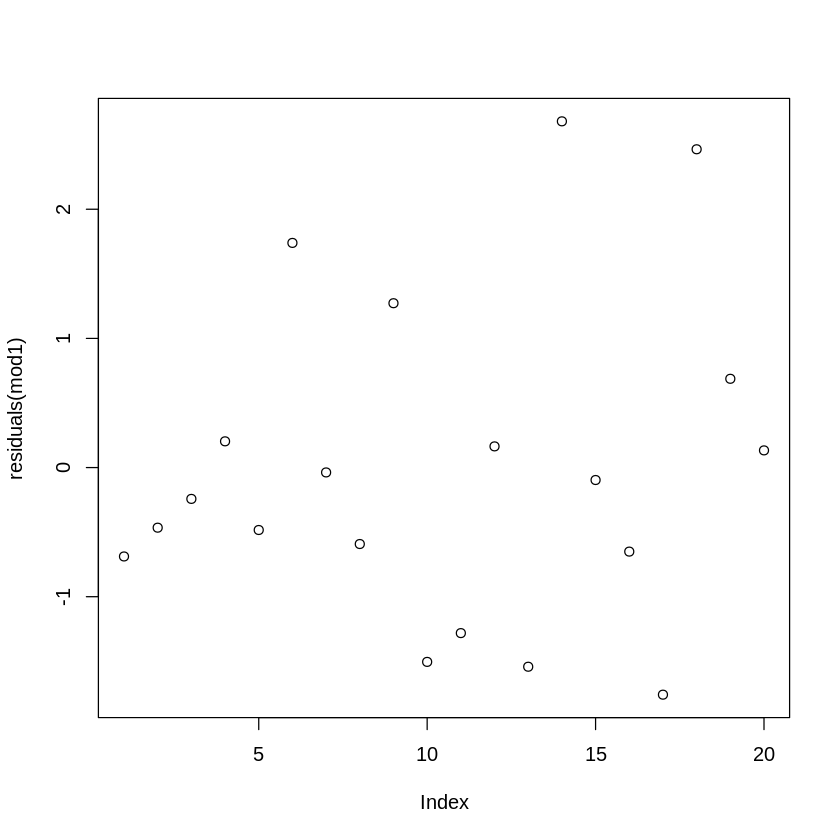

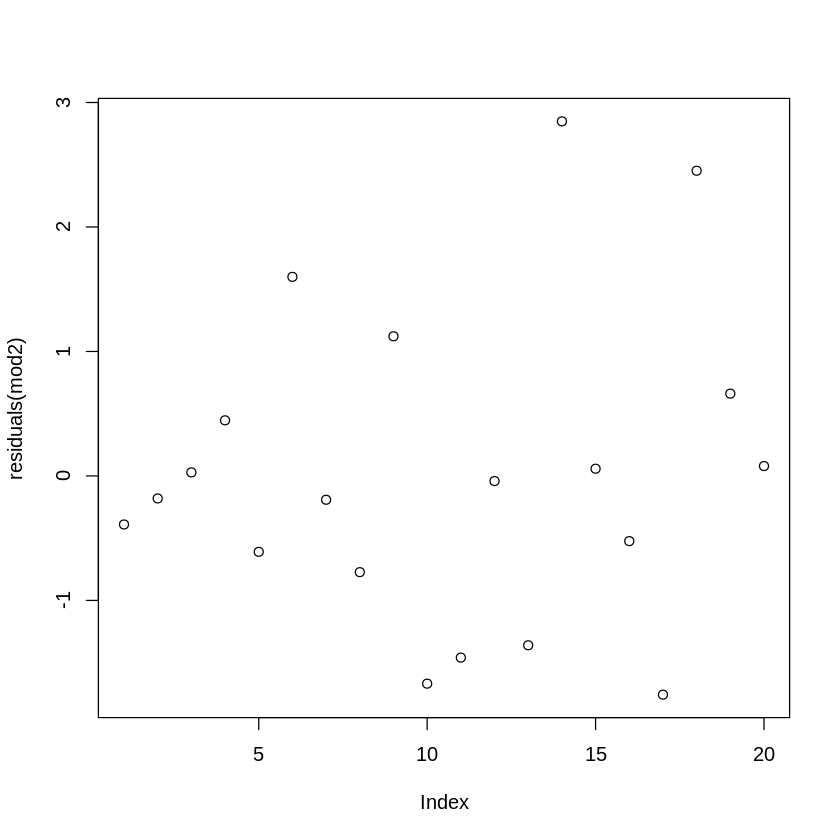

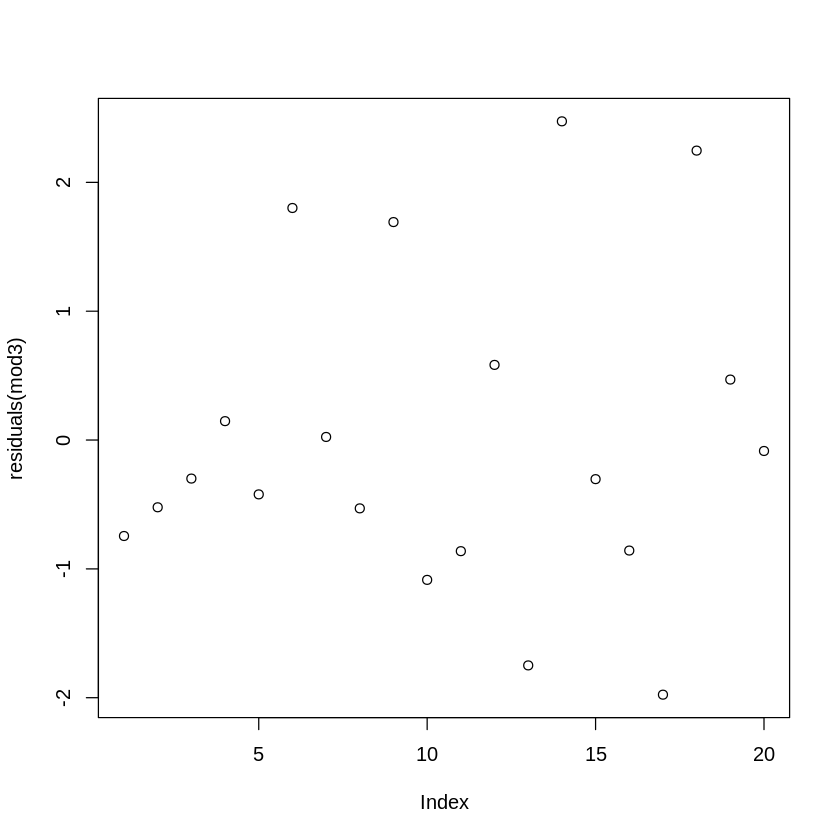

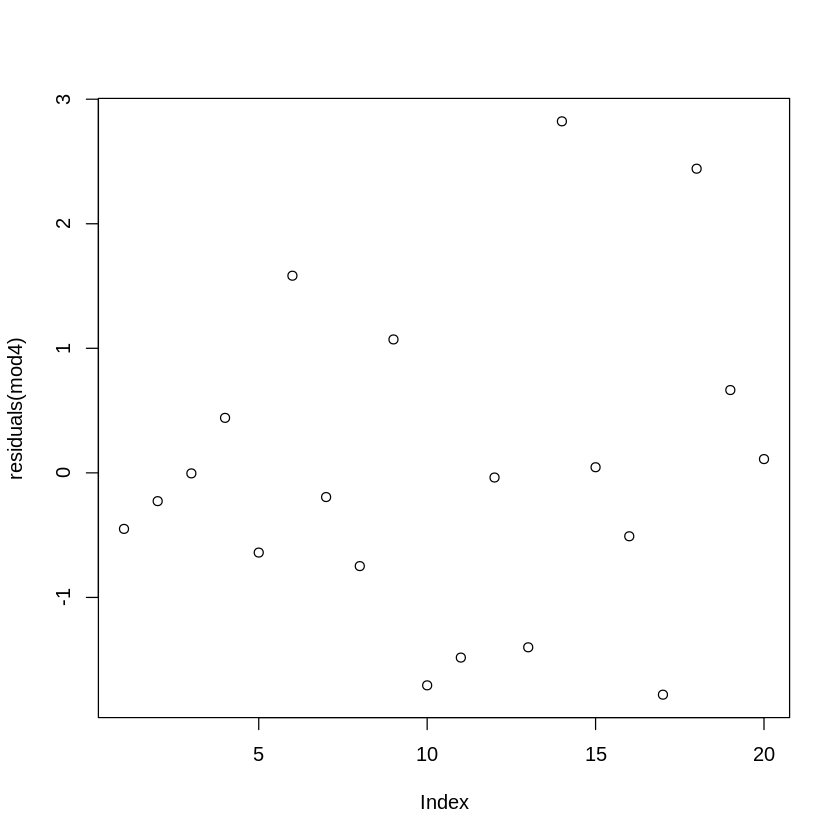

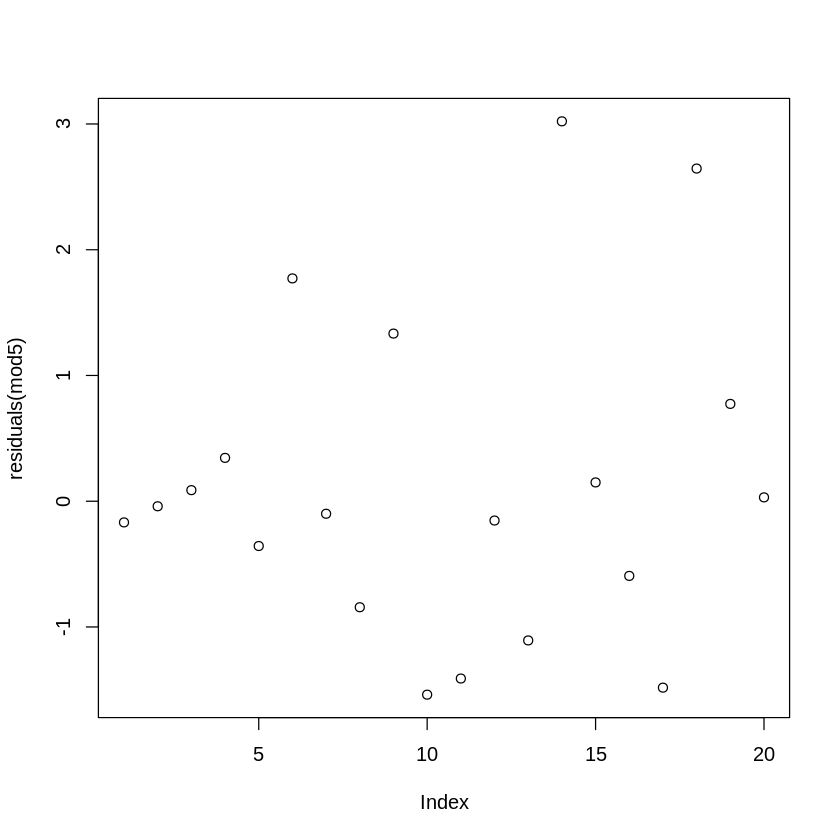

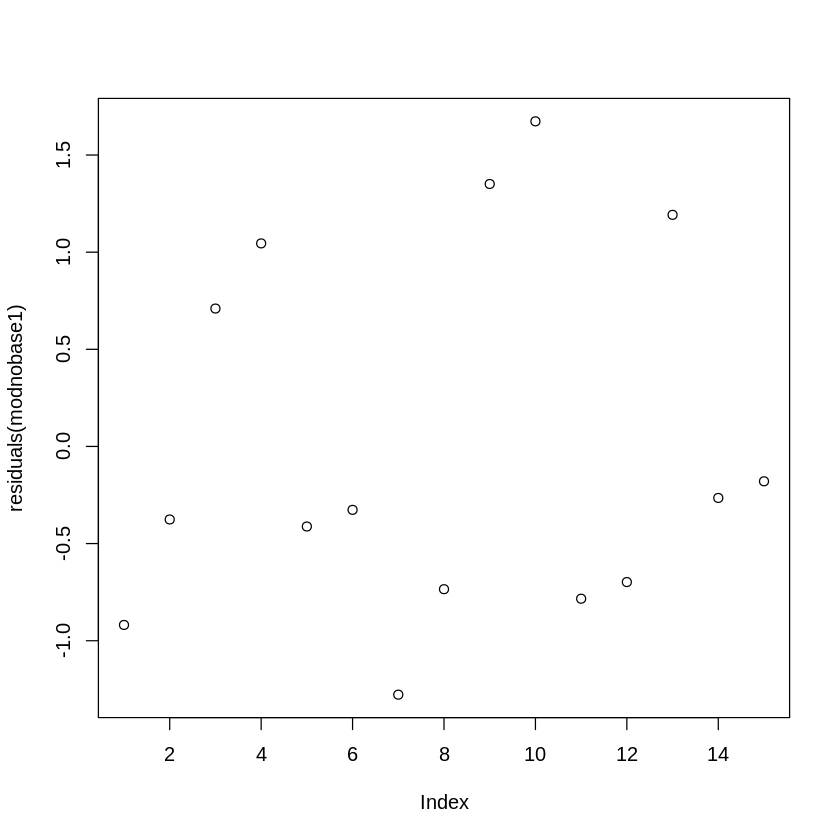

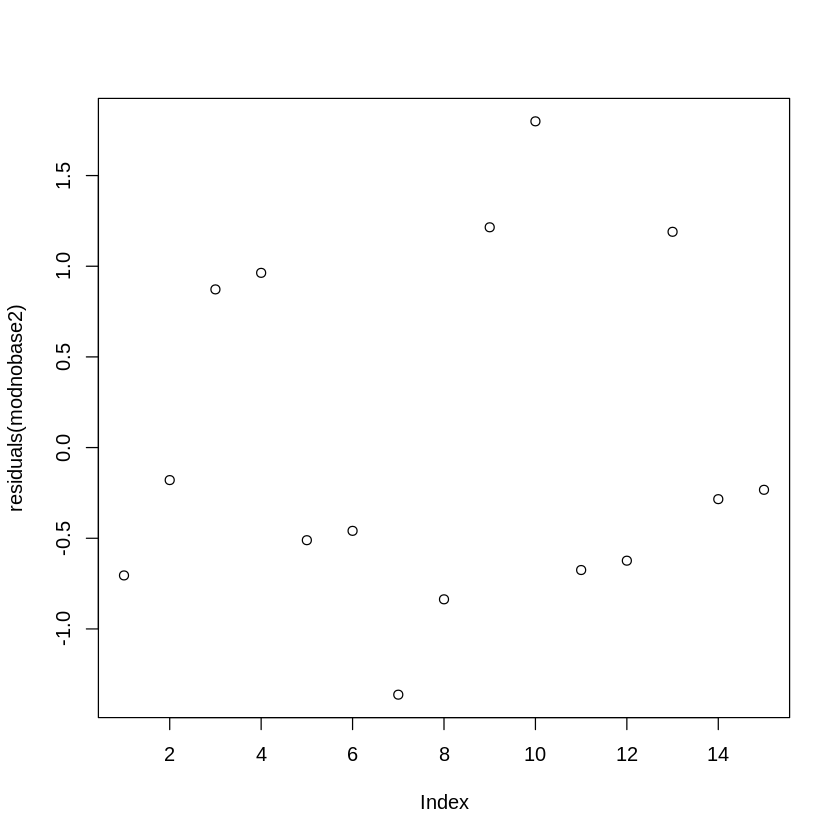

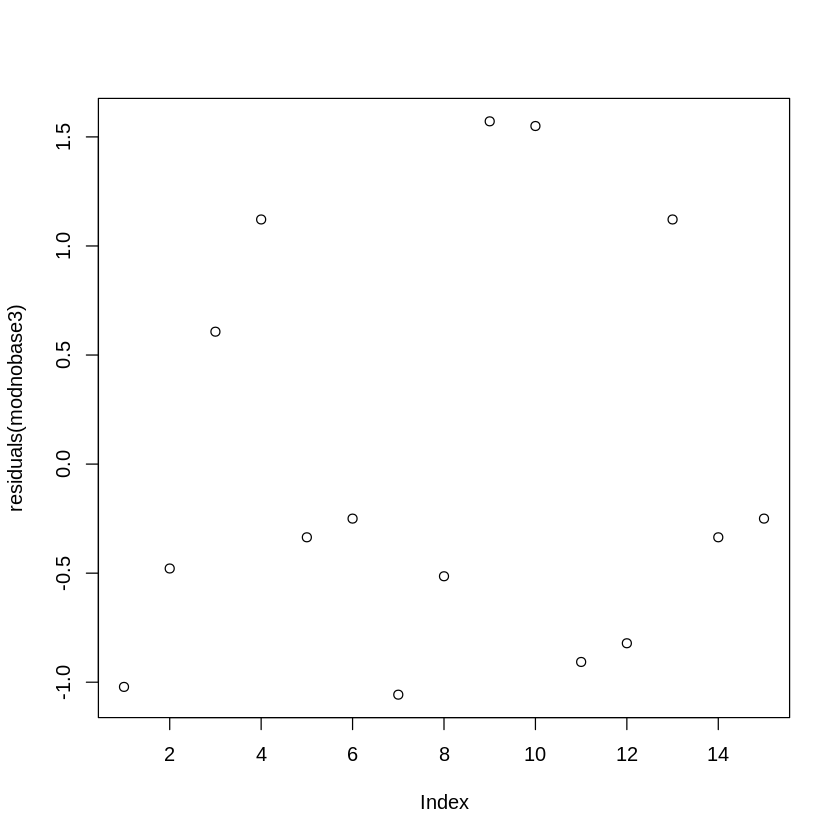

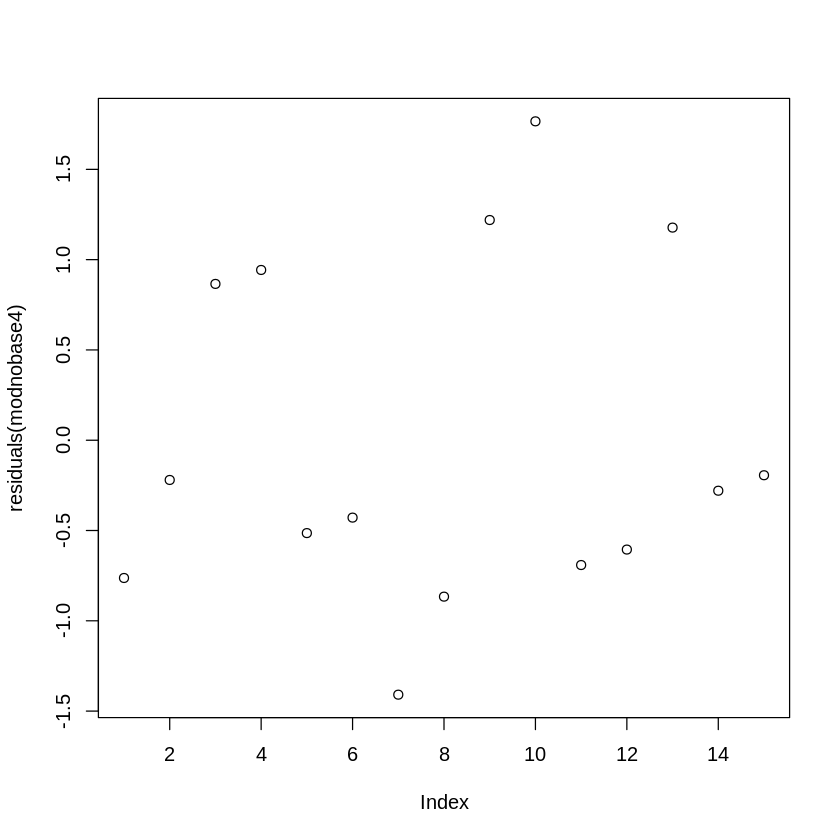

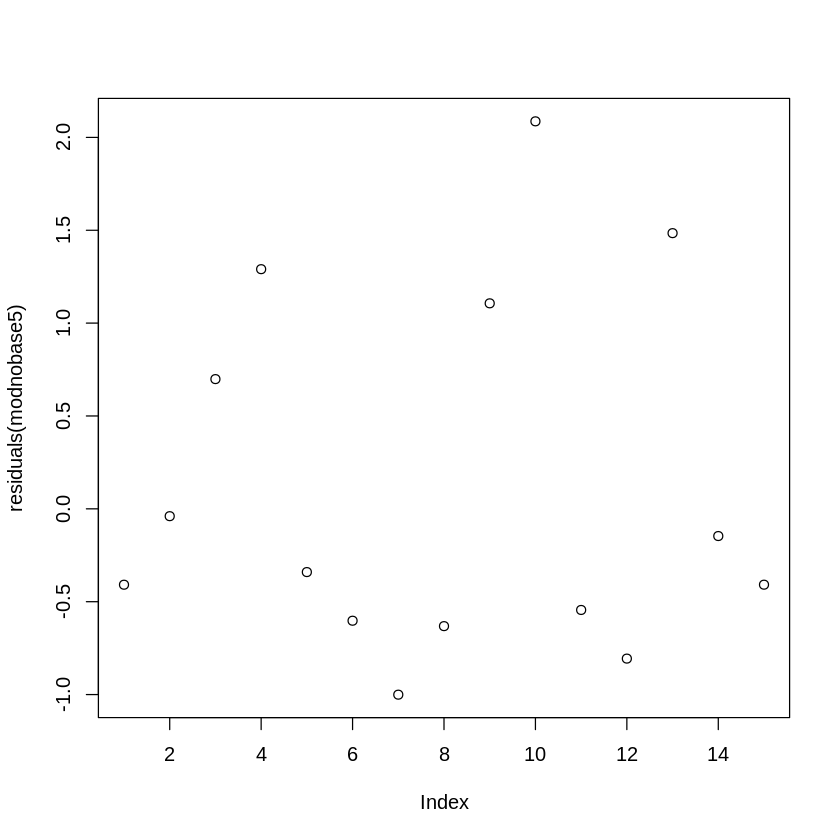

In [5]:
mod1<-lmer(BMI~1+time+baseline+(1|ID),data=data.bmi)
mod2<-lmer(BMI~time+baseline-1+(1|ID),data=data.bmi)
mod3<-lmer(BMI~time+(1|ID),data=data.bmi)

StandardBMI<-BMI-baseline
StandardBMI
mod4<-lmer(StandardBMI~time+(1|ID),data=data.bmi)
summary(mod4)

mod5<-lmer(StandardBMI~time-1+(1|ID),data=data.bmi)
summary(mod5)

modellist<-list(mod1,mod2,mod3,mod4,mod5)
fixedeffect<-list()
randomeffect<-list()
ICC<-list()
modelinfo<-list()

for(i in 1:5){
  fixedeffect[[i]]<-findcoefficients(modellist[[i]])
  randomeffect[[i]]<-findrandomcomp(modellist[[i]])
  ICC[[i]]<-(randomeffect[[i]][1,2])/(randomeffect[[i]][1,2]+randomeffect[[i]][2,2])
  modelinfo[[i]]<-list(fixedeffect[[i]],randomeffect[[i]],ICC[[i]])
}
modelinfo[[1]];modelinfo[[2]];modelinfo[[3]]

count2<-c(1:15)
ID2<-c(rep(1,3),rep(2,3),rep(3,3),rep(4,3),rep(5,3))
time2<-c(rep(c(1,2,4),5))
baseline2<-c(rep(20,3),rep(25,3),rep(26,3),rep(21,3),rep(23,3))
BMI2<-c(21,22,24,28,27,28,24,25,28,26,24,25,28,27,28)
data.bmi2<-data.frame(ID2,time2,baseline2,BMI2)

modnobase1<-lmer(BMI2~1+time2+baseline2+(1|ID2),data=data.bmi2)
modnobase2<-lmer(BMI2~time2+baseline2-1+(1|ID2),data=data.bmi2)
modnobase3<-lmer(BMI2~time2+(1|ID2),data=data.bmi2)



StandardBMI2<-BMI2-baseline2
StandardBMI2

modnobase4<-lmer(StandardBMI2~time2+(1|ID2),data=data.bmi2)
summary(modnobase4)

modnobase5<-lmer(StandardBMI2~time2-1+(1|ID2),data=data.bmi2)
summary(modnobase5)

modellist2<-list(modnobase1,modnobase2,modnobase3,modnobase4,modnobase5)

for(i in 6:10){
  fixedeffect[[i]]<-findcoefficients(modellist2[[i-5]])
  randomeffect[[i]]<-findrandomcomp(modellist2[[i-5]])
  ICC[[i]]<-(randomeffect[[i]][1,2])/(randomeffect[[i]][1,2]+randomeffect[[i]][2,2])
  modelinfo[[i]]<-list(fixedeffect[[i]],randomeffect[[i]],ICC[[i]])
}

modelinfo

data.bmi

predict(mod1)[c(1,5,9,13,17)]
baseline[c(1,5,10,15,20)]
predict(mod3)[c(1,5,9,13,17)]
baseline[c(1,5,10,15,20)]
sum((predict(mod1)-BMI)^2)
sum((predict(modnobase1)-BMI2)^2)
sum((predict(mod2)-BMI)^2)
sum((predict(modnobase2)-BMI2)^2)
sum((predict(mod3)-BMI)^2)
sum((predict(modnobase3)-BMI2)^2)
sum((predict(mod4)-BMI)^2)
sum((predict(modnobase4)-BMI2)^2)
sum((predict(mod5)-BMI)^2)

sum((predict(modnobase5)-BMI2)^2)

plot(residuals(mod1))

plot(residuals(mod2))

plot(residuals(mod3))

plot(residuals(mod4))

plot(residuals(mod5))

plot(residuals(modnobase1))

plot(residuals(modnobase2))

plot(residuals(modnobase3))

plot(residuals(modnobase4))

plot(residuals(modnobase5))